# Tesla and GameStop Historical Stock & Revenue Data Scraping and Building a Dashboard

This project explores the relationship between stock price trends and revenue performance for Tesla and GameStop. Web scraping was utilized to extract historical revenue data from Macrotrends.com, while the yfinance Python library retrieved stock price data. By comparing revenue patterns with stock price fluctuations, the analysis uncovered key insights into potential anomalies and short-selling activities, providing a deeper understanding of market dynamics and highlighting factors influencing these companies’ valuations.

## Use yfinance to extract stock daata

In [1]:
!pip install yfinance
!pip install matplotlib

import pandas as pd
import yfinance as yf

/Users/graceluan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
#Tesla Stock Price
tesla = yf.Ticker('TSLA')
tesla_price_data = tesla.history(period='max')
tesla_price_data.reset_index(inplace=True)
tesla_price_data.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0


<Axes: title={'center': 'Daily Tesla Open Price'}, xlabel='Date'>

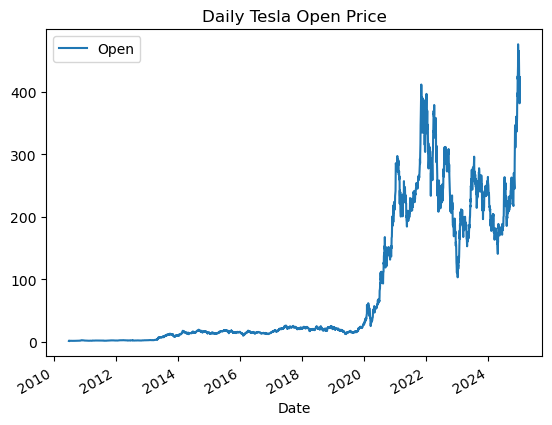

In [119]:
#visualize the high price
tesla_price_data.plot(x='Date',y='Open', title = 'Daily Tesla Open Price')

In [6]:
#GameStop Stock Price
gme = yf.Ticker('GME')
gme_price_data = gme.history(period='max')
gme_price_data.reset_index(inplace=True)
gme_price_data.head(3)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0


<Axes: title={'center': 'Daily GameStop Open Price'}, xlabel='Date'>

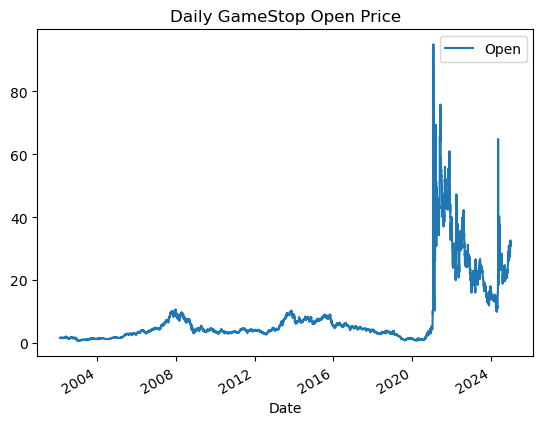

In [120]:
#visualize the high price
gme_price_data.plot(x='Date',y='Open', title = 'Daily GameStop Open Price')

## Use webscarping to get extra revenue data

In [17]:
import requests
from bs4 import BeautifulSoup

### Tesla Quarterly Revenue Data Extraction

In [240]:
url_telsa_R = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
tesla_r = requests.get(url_telsa_R).text
print(tesla_r)

soup_tesla = BeautifulSoup(tesla_r,'html.parser')
soup_tesla

#create a dataframe for tesla revenue
tesla_quarterly_revenue = pd.DataFrame(columns=['Date','Revenue'])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [241]:
# Inspect the html, there are two tables for quarterly and annual revenue repectively. I want to focus on quarterly revenue.
# Isolate the quarterly revenue table, <thead> is 'Tesla Quarterly Revenue'.
tesla_q_table = []
for table in soup_tesla.find_all('table'):
    thead = table.find('thead') #return an object, not a string
    if thead and 'Tesla Quarterly Revenue' in thead.text:
        tesla_q_table = table

print(tesla_q_table)

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744<

In [242]:
tesla_quarterly_revenue

,Date,Revenue


In [243]:
for row in tesla_q_table.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    tesla_quarterly_revenue = pd.concat([tesla_quarterly_revenue,pd.DataFrame({'Date':[date],'Revenue':[revenue]})],ignore_index=True)

In [246]:
# prepare revenue column
tesla_quarterly_revenue['Revenue'] = tesla_quarterly_revenue['Revenue'].str.replace('$','')
tesla_quarterly_revenue['Revenue'] = tesla_quarterly_revenue['Revenue'].str.replace(',','')
#tesla_quarterly_revenue['Revenue'] = tesla_quarterly_revenue['Revenue'].astype(int)

# remove empty and null
tesla_quarterly_revenue.dropna(inplace=True)
tesla_quarterly_revenue = tesla_quarterly_revenue[tesla_quarterly_revenue['Revenue'] != '']

# prepare datetime
tesla_quarterly_revenue['Date'] = tesla_quarterly_revenue['Date'].astype('datetime64[ns]')
tesla_quarterly_revenue = tesla_quarterly_revenue.sort_values(by='Date')

tesla_quarterly_revenue.tail()

,Date,Revenue
4,2021-09-30,13757
3,2021-12-31,17719
2,2022-03-31,18756
1,2022-06-30,16934
0,2022-09-30,21454


### GameStop Quarterly Revenue Extraction

In [151]:
url_gme_R ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [169]:
gme_r = requests.get(url_gme_R).text
soup_gme = BeautifulSoup(gme_r,'html.parser')
soup_gme

<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

In [170]:
gme_quarterly_revenue = pd.DataFrame(columns=['Date','Revenue'])
gme_quarterly_revenue

,Date,Revenue


In [173]:
#GameStop Quarterly Revenue
gme_q_table = []
for table in soup_gme.find_all('table'):
    thead = table.find('thead')
    if thead and 'GameStop Quarterly Revenue' in thead.text:
        gme_q_table = table

print(gme_q_table)

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>


In [192]:
for row in gme_q_table.find('tbody').find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text
    gme_quarterly_revenue = pd.concat([gme_quarterly_revenue, pd.DataFrame({'Date':[date],'Revenue':[revenue]})],ignore_index=True)

In [237]:
# prepare revenue column
gme_quarterly_revenue['Revenue'] = gme_quarterly_revenue['Revenue'].str.replace('$','')
gme_quarterly_revenue['Revenue'] = gme_quarterly_revenue['Revenue'].str.replace(',','')
gme_quarterly_revenue['Revenue'] = gme_quarterly_revenue['Revenue'].astype(int)

# remove empty and null
gme_quarterly_revenue.dropna(inplace=True)
gme_quarterly_revenue = gme_quarterly_revenue[gme_quarterly_revenue['Revenue'] != '']

# prepare datetime
gme_quarterly_revenue['Date'] = gme_quarterly_revenue['Date'].astype('datetime64[ns]')
gme_quarterly_revenue = gme_quarterly_revenue.sort_values(by='Date')

gme_quarterly_revenue.tail()

,Date,Revenue
186,2020-04-30,1021
248,2020-04-30,1021
310,2020-04-30,1021
124,2020-04-30,1021
0,2020-04-30,1021


## Graph with Plotly and Build Dashboard

In [197]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

In [198]:
# create a function make_graph

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [247]:
make_graph(tesla_price_data,tesla_quarterly_revenue,'Tesla')

/var/folders/25/s7hvc6892zz7_l6079ntkx480000gn/T/ipykernel_54854/4243045922.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/Users/graceluan/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/var/folders/25/s7hvc6892zz7_l6079ntkx480000gn/T/ipykernel_54854/4243045922.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can 

In [238]:
make_graph(gme_price_data,gme_quarterly_revenue,'GameStop')

/var/folders/25/s7hvc6892zz7_l6079ntkx480000gn/T/ipykernel_54854/4243045922.py:7: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/Users/graceluan/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/var/folders/25/s7hvc6892zz7_l6079ntkx480000gn/T/ipykernel_54854/4243045922.py:8: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can 